# <center> <font color='blue'>Aluno:</font> Bruno Lima de Freitas <center>
# <center> <font color='blue'>Universidade:</font> Universidade Federal Fluminense (UFF) <center>
# <center> <font color='blue'>Disciplina :</font> Estágio Curricular Obrigatório I <center>
# <center> <font color='blue'>Orientador:</font> Rodrigo Bijani <center>

# Objetivo do Trabalho
>&emsp;Este trabalho consta em criar um modelo isostático 2D com o uso da linguaguem python (OPEN SOURCE) no ambiente jupyter notebook, com o objetivo de apresentar uma alternativa para a correção isostática, ou seja, uma correção para o efeito da raiz crustal sobre dados gravimétricos aferidos em regiões cujo relevo é aproximado por uma função Gaussiana.

# Introdução    
>&emsp;Podemos ser levados a pensar que as massas topográficas estão simplesmente sobrepostas numa crosta essencialmente homogênea. Se assim fosse, a redução de Bouguer removeria as irregularidades médias do campo gravitacional, e assim as anomalias da gravidade de Bouguer seriam pequenas, tomando valores em torno de zero. No entanto, isso não se verifica. As anomalias de Bouguer em regiões montanhosas são sistematicamente negativas e podem tomar valores elevados, aumentando em média cerca de 100 mGal por 1000 metros de elevação. A única explicação possível é que há uma certa deficiência de massas sob as montanhas, o que faria com que o efeito das massas topográficas, sobre os valores medidos da gravidade, sofreria uma certa compensação. Foram desenvolvidas algumas teorias para justificar esta compensação e uma delas foi o modelo de Airy-Heiskanen que será utilizado durante esse trabalho de estágio curricular.

# Modelo de Airy-Heiskanen
>&emsp;O modelo de Airy (aplicado para fins geodésicos por Heiskanen) não considera variações de densidade mas trata a litosfera como tendo uma profundidade variável. Para manter o equilíbrio, a litosfera deverá ser mais espessa sob um relevo topográfico de maior altitude e mais fina sob os oceanos. Por razões de cálculo, a litosfera é vista como composta por blocos independentes. Todos essas questões estão sendo ilustradas na imagem abaixo:

<img src='figs/estagio-modelo-airy.png' width="300px" align="center">

# Fluxo de Trabalho
>## Etapa 1
>> **Objetivo** 
<br>
<br> &emsp;Criar dados sintéticos que serão utilizados para gerar o relevo e consequentemente, a raiz crustal.
<br>
<br> **Desenvolvimento** 
<br>
<br> &emsp;Inicialmente, serão importadas todas as bibliotecas que serão utilizadas ao longo do trabalho. Além delas, também serão importadas funções a parte mas estas já serão importadas apenas quando forem utilizadas.
<br> &emsp;Posteriormente, serão coletadas informações que permitirão a criação de vetores que contenham todos os valores dos eixos x, eixo associado ao deslocamento horizontal, e z, eixo associado ao deslocamento em profundidade. Estes vetores serão utilizados para a criação de diversos elementos associados a esse trabalho e que serão citados mais adiante.
<br> &emsp;Finalmente, os vetores x e z são criados.
>## Considerações dessa etapa
>> (1) Considera-se que o relevo em estudo é bem ajustado por uma gaussiana; <br>
>> (2) Considera-se que o relevo é representado por apenas uma única montanha e de forma que ela esteja centralizada nos plots que serão gerados mais a frente deste trabalho. Uma certa liberdade é dada para configurar esse relevo.

In [1]:
# Import das bibliotecas necessarias:
import sys # essa biblioteca esta apenas relacionada com o uso das funcoes mostradas aqui pelo aluno e orientador eu seus computadores
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path referente aa localizacao do modulo:
#sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Gerando as informacoes para a construcao do relevo: (Parte 1)
# Coletando os limites em x e z do levantamento sintetico alem do numero de observacoes:
nobs = 51 # número de observacoes
zmin = 0.0 # limite mínimo em z do levantamento sintético em m
zmax = 2000.0 # limite máximo em z do levantamento sintético em m
xmin = 0.0 # limite mínimo em x do levantamento sintético em m
xmax = 500.0 # limite máximo em x do levantamento sintético em m

In [4]:
# Gerando as informacoes para a construcao do relevo: (Parte 2)

# Definindo as coordenadas do levantamento sintetico:
# Gerando valores para x:
x = np.linspace(xmin, xmax, nobs, endpoint=True)

# Gerando valores para z de forma que possamos ajustar bem por uma gaussiana sem grandes dificuldades:
z = np.linspace(0, 0, nobs, endpoint=True) # criando o vetor
aux = 7 
# a variavel aux possibilita a consideracao de que parte do relevo esteja ao nivel medio do mar, ou seja, z = 0
# os valores de z que estarao ao nivel medio do mar serao os primeiros e ultimos valores, sempre
for i in range (nobs):
    if i < aux or (nobs - i) <= aux:
        z[i] = 0 # estabelecendo os valores ao nivel medio dos mares
    else: # adicionando o relevo acima do nivel medio dos mares
        if (nobs - (2 * aux)) % 2 == 0: # para esse caso, a parte mais alta do relevo e representada por um plato
            z_int = zmax / ((nobs/2) - aux)
            if i < (nobs/2):
                z[i] = - zmin - z_int * (i - aux + 1)
            else:
                z[i] = z[nobs - i - 1]
        else:
            z_int = zmax / ((nobs/2) + 0.5 - aux) # para esse caso, a parte mais alta do relevo e representada por um pico
            if i < (nobs/2):
                z[i] = - zmin - z_int * (i - aux + 1)
            else:
                z[i] = z[nobs - i - 1]

>## Etapa 2
>> **Objetivo** 
<br>
<br> &emsp;Produzir um plot que contenha o relevo e a raiz crustal associada. Será considerado um nível de compensação que corresponde a maior profundidade da raiz crustal e para representar o relevo, uma gaussiana será utilizada. Essa gaussiana será gerada a partir dos dados sintéticos criados e por sua vez, eles já foram criados de forma que possam ser ajustados por uma gaussiana de forma satisfatória.
<br>
<br> **Desenvolvimento** 
<br>
<br> &emsp;Inicialmente, será produzido um plot (plot 1) com os dados criados acima. 
<br> &emsp;Posteriormente, será produzida a gaussiana, que será plotada ( plot 2) na mesma figura do plot 1, e ela será comparada com os dados criados inicialmente apenas para mostrar que ela pode ser considerada como um bom ajuste.
<br> &emsp;Finalmente, será adicionado a raiz crustal associada ao relevo.

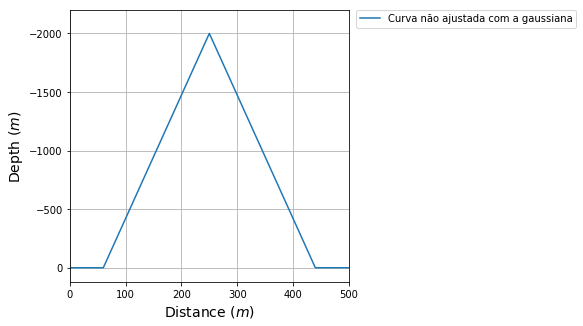

In [5]:
# Plotando uma curva com os dados sinteticos sem o ajuste com a gaussiana:
plt.figure( figsize=(5,5) ) # gerando a figura
plt.plot(x, z) # plotagem da curva com os dados criados inicialmente
plt.xlim( [ x[0], x[nobs - 1]] ) # limites do eixo horizontal
plt.ylim(120, 1.1*min(z)) # limite do eixo vertical 
fs = 14 # tamanho da fonte para os labels
plt.ylabel('Depth $(m)$',fontsize=fs) # titulo do eixo vertical
plt.xlabel('Distance $(m)$',fontsize=fs) # titulo do eixo horizontal
plt.legend(['Curva não ajustada com a gaussiana'], loc=9, 
           bbox_to_anchor=(0.92, .925, 1., .095), ncol=1) # legendas
plt.grid() # visualizacao das linhas do grid
plt.show() # visualizacao do plot

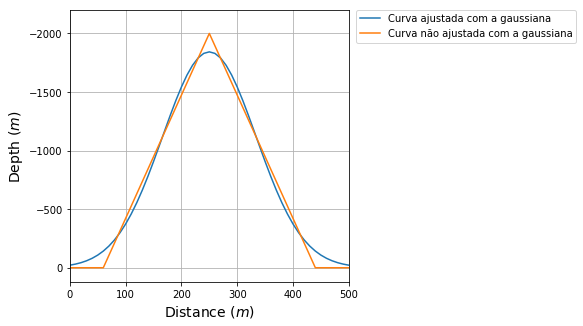

In [6]:
# Plotando a gaussiana produzida abaixo junto com a curva dos dados sinteticos:

# Biblioteca necessaria para a producao da gaussiana:
from scipy.optimize import curve_fit

# Produzindo a gaussiana:
mean = sum(x*z)/sum(z) # media
sigma = np.sqrt(sum(z*(x - mean)**2)/sum(z)) # desvio padrao

def gauss_function(x, a, x0, sigma): # definindo a funcao que calculara os valores da gaussiana
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# Gerando dados essenciais para o plot da gaussiana:
popt, _ = curve_fit(gauss_function, x, z, p0 = [max(z), mean, sigma]) 
# popt contem os valores ideais para os parametros para que a soma dos residuos quadrados 
# de [ f(xdata, * popt) - ydata ] seja minimizada

# popt e a matriz que contem os parametros ideais ou os valores ideais dos coeficientes da equação linear

# Ao usar curve_fit comando, ele retorna os coeficientes ideais na definição da funcao que e armazenada em popt

# Plotando as curvas:
plt.figure( figsize=(5,5) ) # gerando a figura
plt.plot(x, gauss_function(x, *popt)) # plotando a gaussiana
# *popt e uma forma de chamar todos os valores em popt de uma maneira rapida
plt.plot(x, z) # plotando a curva com os dados criados inicialmente
plt.xlim( [ x[0], x[nobs - 1]] ) # limite horizontal
plt.ylim(120, 1.1*min(z)) # limite vertical
fs = 14 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs) # titulo do eixo vertical
plt.xlabel('Distance $(m)$',fontsize=fs) # titulo do eixo horizontal
plt.legend(['Curva ajustada com a gaussiana','Curva não ajustada com a gaussiana'], loc=9, 
           bbox_to_anchor=(0.92, .925, 1., .095), ncol=1) # legendas
plt.grid() # visualizacao das linhas de grid
plt.show() # visualizacao dos plots

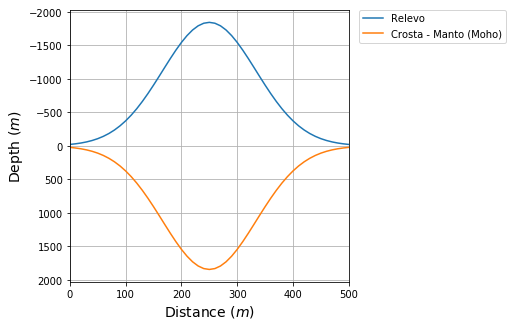

In [7]:
# Plotando o relevo representado pela gaussiana e a raiz crustal associada:
ref = 0.0 # valor para o nivel de compensacao # verificar a necessidade

plt.figure( figsize=(5,5) ) # gerando a figura
plt.plot(x, gauss_function(x, *popt)) # plotando o relevo
plt.plot(x, -gauss_function(x, *popt) + ref) # plotando a descontinuidade de Moho
plt.xlim( [ x[0], x[nobs - 1]] ) # limites do eixo horizontal
plt.ylim( 1.1*max(-gauss_function(x, *popt)), 1.1*min(gauss_function(x, *popt))) # limites do eixo vertical
fs = 14 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs) # titulo do eixo vertical
plt.xlabel('Distance $(m)$',fontsize=fs) # titulo do eixo horizontal
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.80, .925, 1., .095), ncol=1) # legendas
plt.grid() # visualizacao das linhas de grid
plt.show() # visualizacao dos plots

>## Etapa 3
>> **Objetivo** 
<br>
<br> &emsp;Associar uma densidade a elementos em profundidade. Retângulos serão criados e usados para representar a crosta enquanto que diversos pontos individuais serão associados ao manto. A associação da densidade a esses elementos permitirá o cálculo da anomalia da gravidade.
<br>
<br> **Desenvolvimento** 
<br>
<br> &emsp;Inicialmente, todas as informações necessárias para a geração dos retângulos serão coletadas. Com essas informações reunidas, os retângulos são gerados logo em seguida.
<br> &emsp;Posteriormente, todas as informações referentes a malha de pontos, que será relacionada ao manto, serão geradas, permitindo a criação desta malha logo em seguida.
<br> &emsp;Finalmente, tendo todas essas informações acumuladas, será plotado a subsuperfície representada por retângulos e pontos, todos relacionados a um determinado valor de densidade (kg/m³).

In [8]:
# Gerando os retângulos que serão acrescentados ao plot:
# Esses retangulos serão associados a uma determinada massa, gerando uma representacao real de uma subsuperficie hipotetica

# Numero de retangulos que se deseja:
nr = 97

# Gerando os pontos que irão definir os centros dos retangulos:
# Coordenadas horizontais dos pontos:
xr = np.linspace(xmin, xmax, nr, endpoint=True)

# Definindo as coordenadas dos retangulos que serao plotados:
xrmed = ( xr[0] + xr[1] ) / 2.0 # valor central entre o primeiro e segundo ponto
x_ret = abs( xr[0] - ( xrmed ) ) # metade da espessura horizontal de cada retangulo
# o valor x_ret sera usado durante a etapa de visualizacao grafica para a possibilizar a geracao dos retangulos

# Criacao de listas, x_plot e z_plot, de forma que contenham outras listas, ou seja, sublistas
# Cada sublista se refere a um determinado retangulo
# Cada sublista apresentara as coordenadas horizontais ou as verticais dos pontos referentes a um determinado retangulo
x_plot = [] # contem as coordenadas horizontais de todos os pontos referentes a cada retangulo
z_plot = [] # contem as coordenadas verticais de todos os pontos referentes a cada retangulo
for i in range(nr): # construindo x_plot e z_plot
    x_plot.append( [ xr[i] - x_ret, xr[i] + x_ret, xr[i] + x_ret, xr[i] - x_ret, xr[i] - x_ret ] )
    z_plot.append( [ gauss_function(xr[i], *popt), gauss_function(xr[i], *popt), -gauss_function(xr[i], *popt), 
                    -gauss_function(xr[i], *popt), gauss_function(xr[i], *popt) ] )

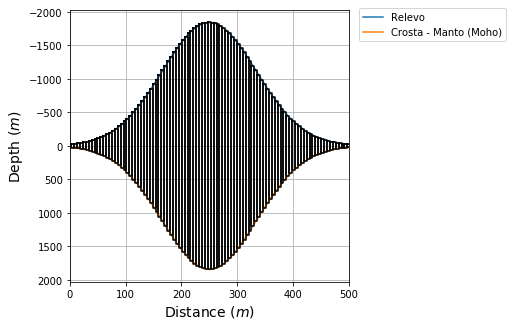

In [9]:
# Acrescentando os retangulos referentes a crosta ao nosso modelo de subsuperficie:
plt.figure( figsize=(5,5) ) # gerando a figura
plt.plot(x, gauss_function(x, *popt)) # plotando o relevo
plt.plot(x, -gauss_function(x, *popt) + ref) # plotando a descontinuidade de moho

for i in range(nr):
    plt.plot( x_plot[i], z_plot[i], "black") # visualizacao dos retangulos

plt.xlim( [ x[0], x[nobs - 1]] ) # limites do eixo horizontal
plt.ylim( 1.1*max(-gauss_function(x, *popt)), 1.1*min(gauss_function(x, *popt))) # limites do eixo vertical
fs = 14 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs) # titulo do eixo vertical
plt.xlabel('Distance $(m)$',fontsize=fs) # titulo do eixo horizontal
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid() # visualizacao das linhas de grid
plt.show() # visualizacao dos plots

In [10]:
# Produzindo uma malha de pontos:
# Apenas parte dessa malha ira ser relacionada ao manto
# Numero de pontos da malha:
npo = 200

# Produzindo as coordenadas desses pontos:
x_manto = np.linspace( xmin, xmax, npo, endpoint=True)
z_manto = np.linspace( zmin, max(-gauss_function(x, *popt)) + 10, npo, endpoint=True) 

# Produzindo uma malha:
X,Z = np.meshgrid( x_manto, z_manto)

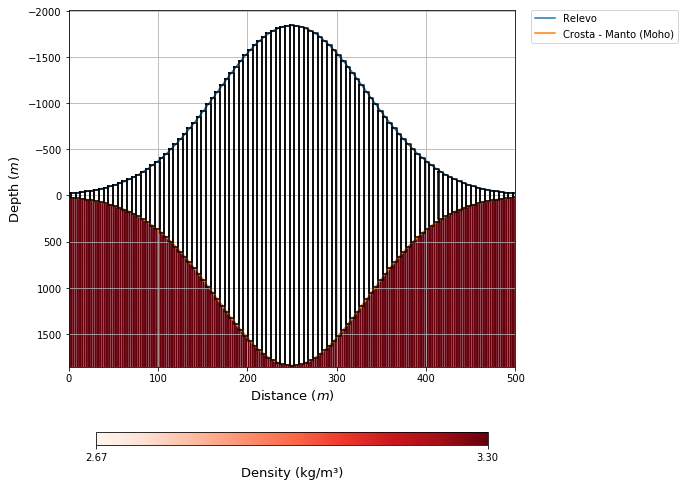

In [11]:
# Acrescentando os diversos pontos referentes ao manto:
plt.figure( figsize=(8,8) ) # gerando a figura
plt.plot(x, gauss_function(x, *popt)) # plotando o relevo
plt.plot(x, -gauss_function(x, *popt) + ref) # plotando a descontinuidade de moho

for i in range(nr):
    plt.plot( x_plot[i], z_plot[i], "black") # visualizacao dos retangulos

# produzindo uma matriz onde cada elemento se refere a um ponto da malha criada anteriormente
# cada elemento da matriz apresenta um determinado valor de densidade (kg/m³)
# essa matriz sera usada para indicar quais pontos da malha estao relacionados ao manto
rho = np.copy(Z) # criando a matriz
for i in range (Z.shape[0]):
    for j in range (Z.shape[1]):
        if rho[j,i] > -gauss_function(X[i], *popt)[i]:
            rho[j,i] = 3.3 # pontos da malha que estao relacionados ao manto
        else:
            rho[j,i] = np.nan # pontos da malha que nao estao relacionados ao manto

plt.scatter(X, Z, c=rho, cmap='Reds', s=1, vmin=2.670, vmax=3.3) # plotando a malha de pontos
cbar = plt.colorbar(aspect=30, fraction=0.03, orientation='horizontal', ticks=[2.670, 3.3]) # adicionando a barra de cores
cbar.set_label('Density (kg/m³)', fontsize=13, rotation=0) # configuracoes da barra de cores

plt.xlim( [ x[0] , x[nobs - 1]] ) # limites do eixo horizontal
plt.ylim(max(-gauss_function(x, *popt)) + 10, min(z) - 10) # limites do eixo vertical
fs = 13 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs) # titulo do eixo vertical
plt.xlabel('Distance $(m)$',fontsize=fs) # titulo do eixo horizontal
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.7, .92, 1., .095), ncol=1) # legendas
plt.grid() # visualizacao das linhas de grid
plt.show() # visualizacao dos plots

>## Etapa 4
>> **Objetivo** 
<br>
<br> &emsp;Aplicando funções para se calcular a contribuição de todos os retângulos e os pontos gerados para a gravidade medida em cada observação realizada.
<br>
<br> **Desenvolvimento** 
<br>
<br> &emsp;Inicialmente, busca-se aplicar a g_prism sobre o primeiro retângulo para verificar se ela está sendo aplicada corretamente e com isso verificado, utiliza-se dessa função para calcular a contribuição de todos os retângulos.
<br> &emsp;Posteriormente, aplicaremos a g_sphere sobre um único ponto e depois sobre todos os demais pontos também.
<br> &emsp;Finalmente, depois que foi verificado o uso correto de ambas as funções e tendo calculado a contribuição de todos os retângulos e pontos separadamente, calcula-se a contribuição total de todos os elementos utilizados nesse trabalho para representar a subsuperfície.
>## Observações
>> (1) Ambas as funções g_prism e g_sphere só funcionam para calcular a contribuição gravimétrica de um único retângulo ou ponto, respectivamente. Então, há a necessidade de se utilizar delas diversas vezes para calcular todas as contribuições de todos os elementos relacionados a esse trabalho.

In [12]:
# Importando bibliotecas:

# Biblioteca para calcular a contribuição dos retangulos: 
from gravity2D import g_prism

# Biblioteca para calcular a contribuição dos pontos:
from gravity2D import g_sphere

In [13]:
# Calculando a contribuicao de um unico retangulo para todos as observacoes para verificar a funcao:

# Coletando dados para aplicar a funcao g_prism:
# Dados relacionados aos pontos de observacao:
z = gauss_function(x, *popt)
# x ja foi dado anteriormente e definido como x = np.linspace(xmin, xmax, nobs, endpoint=True)

# Dados relacionados ao primeiro retangulo dos nossos dados sinteticos:
prism = [ xr[0], 0, ( -2 * gauss_function(xr[0], *popt) ), 1, 2.67] 

# Aplicando a funcao:
gz_rec = g_prism(x,z,prism)
gz_rec # observamos a influencia de um unico retangulo sobre cada ponto de observacao

array([5.43765601e-07, 3.11483875e-07, 1.74582571e-07, 1.01768144e-07,
       6.15426937e-08, 3.82343169e-08, 2.42234480e-08, 1.55897253e-08,
       1.01809734e-08, 6.75128296e-09, 4.55319207e-09, 3.12889992e-09,
       2.19483687e-09, 1.57412917e-09, 1.15579270e-09, 8.69719955e-10,
       6.71268529e-10, 5.31746232e-10, 4.32524491e-10, 3.61383936e-10,
       3.10234648e-10, 2.73685844e-10, 2.48143831e-10, 2.31241966e-10,
       2.21482778e-10, 2.18019409e-10, 2.20532785e-10, 2.29179581e-10,
       2.44598059e-10, 2.67966572e-10, 3.01112795e-10, 3.46668103e-10,
       4.08243326e-10, 4.90552589e-10, 5.99300691e-10, 7.40436414e-10,
       9.18060301e-10, 1.13008615e-09, 1.36150849e-09, 1.57824536e-09,
       1.72965695e-09, 1.76768053e-09, 1.67520311e-09, 1.47846258e-09,
       1.22998416e-09, 9.79945941e-10, 7.59648746e-10, 5.81113303e-10,
       4.43963802e-10, 3.42161613e-10, 2.68206559e-10])

In [14]:
# Calculando a contribuicao gravimetrica de todos os retangulos sobre cada observacao:
gz_ret_total = np.zeros(nobs) # valor inicial
for i in range (nr):
    # z ja foi definido como z = gauss_function(x, *popt)
    # x ja foi definido como x = np.linspace(xmin, xmax, nobs, endpoint=True)
    prism = [ xr[i], 0, ( -2 * gauss_function(xr[i], *popt) ), 1, 2.67]
    gz_ret_total += g_prism(x,z,prism)

gz_ret_total # o valor de contribuicao gravimetrica de todos os retangulos sobre cada ponto de observacao

array([1.03439927e-05, 1.01702504e-05, 9.48326632e-06, 8.57795856e-06,
       7.59337547e-06, 6.60132131e-06, 5.64406027e-06, 4.74972429e-06,
       3.93861785e-06, 3.22490687e-06, 2.61592495e-06, 2.11125527e-06,
       1.70333576e-06, 1.37981187e-06, 1.12648357e-06, 9.29634462e-07,
       7.77307351e-07, 6.59715610e-07, 5.69157034e-07, 4.99719667e-07,
       4.46944896e-07, 4.07522507e-07, 3.79042576e-07, 3.59806345e-07,
       3.48690003e-07, 3.45053769e-07, 3.48690003e-07, 3.59806345e-07,
       3.79042576e-07, 4.07522507e-07, 4.46944896e-07, 4.99719667e-07,
       5.69157034e-07, 6.59715610e-07, 7.77307351e-07, 9.29634462e-07,
       1.12648357e-06, 1.37981187e-06, 1.70333576e-06, 2.11125527e-06,
       2.61592495e-06, 3.22490687e-06, 3.93861785e-06, 4.74972429e-06,
       5.64406027e-06, 6.60132131e-06, 7.59337547e-06, 8.57795856e-06,
       9.48326632e-06, 1.01702504e-05, 1.03439927e-05])

In [17]:
# Calculando a contribuicao de um unico ponto para todos as observacoes para verificar a funcao:

# Coletando dados para aplicar a funcao g_sphere:
# Dados relacionados aos pontos de observacao:
z = gauss_function(x, *popt)
# x ja foi dado anteriormente e definido como x = np.linspace(xmin, xmax, nobs, endpoint=True)

# Dados relacionados ao primeiro ponto dos nossos dados sinteticos:
# Para aplicar essa funcao, todos as informacoes fornecidas precisam ser listas
x_center = [ X[0][0] ]
z_center = [ Z[0][0] ]
mass = [ 2 ]
prism = [ x_center, z_center, mass] # [x_center(meters), z_center(meters), mass(kg)]

# Aplicando a funcao:
gz_pt = g_sphere(x,z,prism)
gz_pt # observamos a influencia de um unico ponto sobre cada ponto de observacao

array([2.79699910e-08, 1.20198132e-08, 5.34957524e-09, 2.68946813e-09,
       1.47634293e-09, 8.57055797e-10, 5.16150433e-10, 3.19300292e-10,
       2.02045389e-10, 1.30627084e-10, 8.63184963e-11, 5.83532029e-11,
       4.03990782e-11, 2.86709447e-11, 2.08749352e-11, 1.56026116e-11,
       1.19776236e-11, 9.44722883e-12, 7.65800599e-12, 6.38099518e-12,
       5.46613417e-12, 4.81423825e-12, 4.35961406e-12, 4.05921540e-12,
       3.88590507e-12, 3.82437214e-12, 3.86885064e-12, 4.02215694e-12,
       4.29580067e-12, 4.71107360e-12, 5.30108954e-12, 6.11368637e-12,
       7.21476337e-12, 8.69068141e-12, 1.06461771e-11, 1.31899741e-11,
       1.63938178e-11, 2.02065560e-11, 2.43204903e-11, 2.80534906e-11,
       3.04184638e-11, 3.05363975e-11, 2.82026485e-11, 2.40639973e-11,
       1.91952444e-11, 1.45237360e-11, 1.05622169e-11, 7.45751510e-12,
       5.14708666e-12, 3.48747034e-12, 2.32556422e-12])

In [18]:
# Calculando a contribuicao gravimetrica de todos os pontos sobre cada observacao:
gz_pt_total = np.zeros(nobs) # valor inicial 
mass =  [ np.full( (X.shape), 2) ] # valores de massa de todos os pontos da malha

for i in range ( X.shape[0] ):
    for j in range ( X.shape[1] ):
        if rho[i,j] == 3.3:
            # z ja foi definido como z = gauss_function(x, *popt)
            # x ja foi definido como x = np.linspace(xmin, xmax, nobs, endpoint=True)
            x_center = [ X[i][j] ]
            z_center = [ Z[i][j] ]
            mass = [ 2 ]
            prism = [ x_center, z_center, mass ]
            gz_pt_total += g_sphere(x,z,prism)
        
gz_pt_total # o valor de contribuicao gravimetrica de todos os pontos sobre cada ponto de observacao

array([6.63007799e-07, 6.17784265e-07, 5.62204357e-07, 5.04834365e-07,
       4.49905183e-07, 3.98995506e-07, 3.52370402e-07, 3.09735289e-07,
       2.70669591e-07, 2.34890027e-07, 2.02355891e-07, 1.73206330e-07,
       1.47597823e-07, 1.25562789e-07, 1.06960572e-07, 9.15081073e-08,
       7.88423185e-08, 6.85782015e-08, 6.03489951e-08, 5.38285548e-08,
       4.87407947e-08, 4.48612366e-08, 4.20144728e-08, 4.00700439e-08,
       3.89382453e-08, 3.85667140e-08, 3.89382453e-08, 4.00700439e-08,
       4.20144728e-08, 4.48612366e-08, 4.87407947e-08, 5.38285548e-08,
       6.03489951e-08, 6.85782015e-08, 7.88423185e-08, 9.15081073e-08,
       1.06960572e-07, 1.25562789e-07, 1.47597823e-07, 1.73206330e-07,
       2.02355891e-07, 2.34890027e-07, 2.70669591e-07, 3.09735289e-07,
       3.52370402e-07, 3.98995506e-07, 4.49905183e-07, 5.04834365e-07,
       5.62204357e-07, 6.17784265e-07, 6.63007799e-07])

In [19]:
# Calculando a contribuicao gravimetrica total para cada observação:
gz_total = gz_ret_total + gz_pt_total
gz_total

array([1.10070005e-05, 1.07880347e-05, 1.00454707e-05, 9.08279293e-06,
       8.04328065e-06, 7.00031682e-06, 5.99643067e-06, 5.05945958e-06,
       4.20928744e-06, 3.45979690e-06, 2.81828084e-06, 2.28446160e-06,
       1.85093358e-06, 1.50537466e-06, 1.23344414e-06, 1.02114257e-06,
       8.56149670e-07, 7.28293811e-07, 6.29506029e-07, 5.53548222e-07,
       4.95685691e-07, 4.52383744e-07, 4.21057049e-07, 3.99876389e-07,
       3.87628248e-07, 3.83620483e-07, 3.87628248e-07, 3.99876389e-07,
       4.21057049e-07, 4.52383744e-07, 4.95685691e-07, 5.53548222e-07,
       6.29506029e-07, 7.28293811e-07, 8.56149670e-07, 1.02114257e-06,
       1.23344414e-06, 1.50537466e-06, 1.85093358e-06, 2.28446160e-06,
       2.81828084e-06, 3.45979690e-06, 4.20928744e-06, 5.05945958e-06,
       5.99643067e-06, 7.00031682e-06, 8.04328065e-06, 9.08279293e-06,
       1.00454707e-05, 1.07880347e-05, 1.10070005e-05])

>## Etapa 5
>> **Objetivo** 
<br>
<br> &emsp;Plotando 2 subplots de forma que um deles apresente a subsuperfície representada pelo modelo isostático utilizado nesse trabalho e o outro apresente a intensidade do campo medido referente a cada parte do levantamento sintético.
>## Observações:
>> (1) Os plots foram configurados de forma que eles compartilhem a escala e os limites de seus eixos horizontais.

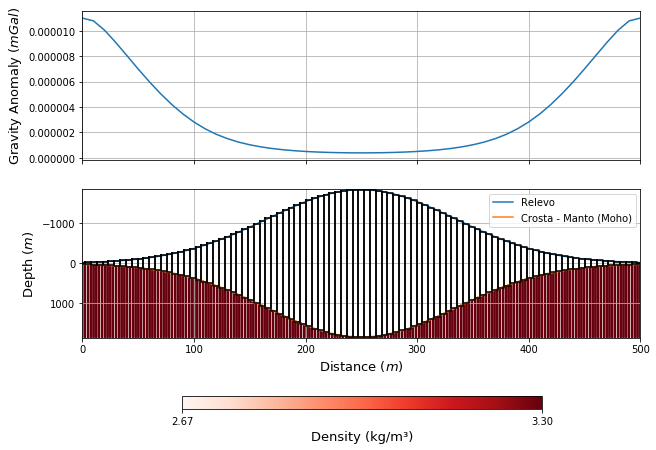

In [85]:
fig = plt.figure(figsize=(10,6),facecolor='w') # gerando a figura

# Primeiro subplot:
ax1 = plt.subplot(211) # subplot que apresenta a intensidade das medicoes ao longo do levantamento
plt.plot(x, gz_total) # plotando as contribuicoes totais ao longo do levantamento
fs1 = 13 # font size for the label
plt.ylabel('Gravity Anomaly $(mGal)$',fontsize=fs1) # titulo do eixo vertical
plt.setp(ax1.get_xticklabels(), visible=False) # deixando o eixo horizontal invisivel
plt.grid() # visualizacao das linhas de grid

# Segundo subplot:
ax2 = plt.subplot(212, sharex=ax1) # subplot que apresenta o modelo de Airy-Heiskanen
plt.plot(x, gauss_function(x, *popt)) # plotando o relevo
plt.plot(x, -gauss_function(x, *popt) + ref) # plotando a descontinuidade de moho
for i in range(nr):
    plt.plot( x_plot[i], z_plot[i], "black") # visualizacao dos retangulos
plt.scatter(X, Z, c=rho, cmap='Reds', s=1, vmin=2.670, vmax=3.3) # plotando a malha de pontos
plt.xlim( [ x[0] , x[nobs - 1]] ) # limites do eixo horizontal
plt.ylim(max(-gauss_function(x, *popt)) + 10, min(z) - 10) # limites do eixo vertical
fs2 = 13 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs2) # titulo do eixo vertical
plt.xlabel('Distance $(m)$',fontsize=fs2) # titulo do eixo horizontal
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.36, .91, 1., .095), ncol=1) # legendas
plt.grid() # visualizacao das linhas de grid

# Barra de cor:
cax = plt.axes([0.264, -0.04, 0.5, 0.03]) # contem as posicoes e expessurass da barra de cor
cbar = plt.colorbar(orientation='horizontal', cax=cax, ticks=[2.670, 3.3]) # adicionando a barra de cor
cbar.set_label('Density (kg/m³)', fontsize=13, rotation=0) # configuracoes da barra de cor

# Visualizacao do plot:
plt.show()

# Conclusão
>&emsp; Durante este trabalho de estágio obrigatório, foi possível a criação de um modelo isostático 2D com o uso da linguaguem python e baseado no modelo de Airy-Heiskanen. Ao observar o resultado final, atenta-se a valores cada vez menores de anomalia de gravidade a medida que desloca-se horizontalmente para o ponto relacionado a posição horizontal que apresenta tanto a maior elevação de relevo como a maior profundidade da descontinuidade de Moho. Essa observação está de acordo com o que seria esperado para o modelo de Airy-Heiskanen, ou seja, a medida que se observa uma maior ausência de massa em uma determinada região de um local, também será observado menores valores da anomalia da gravidade nessa região em relação ao restante do local. <br>
>&emsp; Entretanto, para o que foi desenvolvido aqui poder apresentar valores mais consistentes com a realidade, seria preciso ajustar certas informações mas isso não foi um impedimento para se realizar a análise comentada acima.

# Considerações que surgirão depois que esse trabalho foi finalizado    
>&emsp;A função g_prism utilizada nesse trabalho apresenta erros que foram constatados posteriormente a realização deste estágio curricular. Então, utilizar outra função em seu lugar se esse código for reutilizado.